In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [4]:
dataset = pd.read_csv('RMS_Crime_Incidents_2.csv')
X = dataset.iloc[:, [0, 1]].values

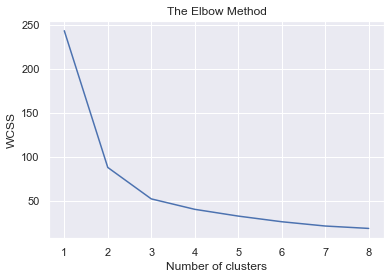

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

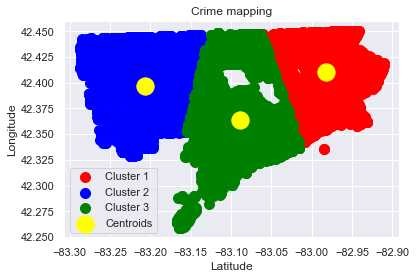

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Crime mapping')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [8]:
df = pd.read_csv('RMS_Crime_Incidents_2.csv')
df.head(5)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-83.166969,42.373278,3042261,1703250081,Plymouth Rd & Manor,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,208,2,2.620000e+14,Barton-McFarland,7,48204,-83.166969,42.373278,3
1,-82.971840,42.441684,3057098,1704290278,Tacoma St & Monarch St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,902,9,2.620000e+14,Regent Park,3,48205,-82.971840,42.441684,5
2,-83.241922,42.353851,3060144,1705040391,Patton St & Constance Ave,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,609,6,2.620000e+14,Warrendale,7,48228,-83.241922,42.353851,6
3,-83.108859,42.368327,3077177,1706130407,Lawton St & Blaine St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,1007,10,2.620000e+14,Jamison,5,48206,-83.108859,42.368327,11
4,-83.068352,42.435629,3085214,1707010359,Revere St & Emery St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,1102,11,2.620000e+14,Pershing,3,48234,-83.068352,42.435629,14


In [9]:
X=df[['oid','latitude','longitude']]
X.head(5)

,oid,latitude,longitude
0,3,42.373278,-83.166969
1,5,42.441684,-82.971840
2,6,42.353851,-83.241922
3,11,42.368327,-83.108859
4,14,42.435629,-83.068352


In [10]:
dataset.head(5)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-83.166969,42.373278,3042261,1703250081,Plymouth Rd & Manor,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,208,2,2.620000e+14,Barton-McFarland,7,48204,-83.166969,42.373278,3
1,-82.971840,42.441684,3057098,1704290278,Tacoma St & Monarch St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,902,9,2.620000e+14,Regent Park,3,48205,-82.971840,42.441684,5
2,-83.241922,42.353851,3060144,1705040391,Patton St & Constance Ave,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,609,6,2.620000e+14,Warrendale,7,48228,-83.241922,42.353851,6
3,-83.108859,42.368327,3077177,1706130407,Lawton St & Blaine St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,1007,10,2.620000e+14,Jamison,5,48206,-83.108859,42.368327,11
4,-83.068352,42.435629,3085214,1707010359,Revere St & Emery St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,2017,1102,11,2.620000e+14,Pershing,3,48234,-83.068352,42.435629,14


In [11]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

<ipython-input-11-72d32d729191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])


In [12]:
X = X[['oid','cluster_label']]
X.head(10)

,oid,cluster_label
0,3,1
1,5,0
2,6,1
3,11,2
4,14,2
5,16,2
6,22,1
7,24,1
8,27,2
9,29,0


In [13]:
clustered_data = df.merge(X, left_on='oid', right_on='oid')
clustered_data.head(5)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid,cluster_label
0,-83.166969,42.373278,3042261,1703250081,Plymouth Rd & Manor,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,208,2,2.620000e+14,Barton-McFarland,7,48204,-83.166969,42.373278,3,1
1,-82.971840,42.441684,3057098,1704290278,Tacoma St & Monarch St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,902,9,2.620000e+14,Regent Park,3,48205,-82.971840,42.441684,5,0
2,-83.241922,42.353851,3060144,1705040391,Patton St & Constance Ave,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,609,6,2.620000e+14,Warrendale,7,48228,-83.241922,42.353851,6,1
3,-83.108859,42.368327,3077177,1706130407,Lawton St & Blaine St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,1007,10,2.620000e+14,Jamison,5,48206,-83.108859,42.368327,11,2
4,-83.068352,42.435629,3085214,1707010359,Revere St & Emery St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,1102,11,2.620000e+14,Pershing,3,48234,-83.068352,42.435629,14,2


In [14]:
clustered_data.to_csv ('clustereddata2.csv', index=None, header = True)

In [15]:
centers = kmeans.cluster_centers_
print(centers)

[[ 42.41045448 -82.98196838]
 [ 42.39670196 -83.20631216]
 [ 42.36345984 -83.08872304]]


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(clustered_data['cluster_label'],kmeans.labels_))
print(classification_report(clustered_data['cluster_label'],kmeans.labels_))

[[6025    0    0]
 [   0 8652    0]
 [   0    0 8516]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6025
           1       1.00      1.00      1.00      8652
           2       1.00      1.00      1.00      8516

    accuracy                           1.00     23193
   macro avg       1.00      1.00      1.00     23193
weighted avg       1.00      1.00      1.00     23193

